In [1]:
import nltk
import pandas as pd
import numpy as np
import codecs
import PyPDF2
import copy

In [2]:
pdfFileObject = open('All_MOUs.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
count = pdfReader.numPages
myPdf_raw = dict()
for i in range(16, count):
    page = pdfReader.getPage(i)
    myPdf_raw[i] = page.extractText()

In [3]:
'''j = 16
for i in range(len(myPdf_copy)):
    myPdf_copy[i] = myPdf_copy[j]
    myPdf_copy.pop(j)
    j += 1'''

myPdf_copy = copy.deepcopy(myPdf_raw)
print(len(myPdf_copy)) #the ouput is 7398 instead of 7414 because the 16 pages don't have any text (7414-16=7398)

7398


In [4]:
for key in myPdf_copy:
    myPdf_copy[key] = ' '.join(myPdf_copy[key].split()).lower()

In [5]:
new_contract_first_page = list()
for key, value in myPdf_copy.items():
    if 'this memorandum of understanding made' in value:
        new_contract_first_page.append(key)       

In [6]:
print(len(new_contract_first_page))

41


In [7]:
print(new_contract_first_page)

[16, 476, 580, 757, 1039, 1403, 1464, 1778, 1961, 2038, 2357, 2812, 3059, 3645, 3876, 4078, 4317, 4568, 4620, 4694, 4781, 4858, 5016, 5204, 5258, 5416, 5651, 5700, 5782, 6054, 6141, 6195, 6589, 6655, 6774, 6855, 6931, 7044, 7084, 7130, 7243]


In [8]:
new_contract_first_page.append(5469-1) #not added automatically due to junmple considered as space (un derstanding)
new_contract_first_page.append(5930-1) #not added automtically due to image input (not uncoded)
new_contract_first_page.append(6997-1) #not added automtically due to image input (not uncoded)
print(len(new_contract_first_page))

44


In [9]:
new_contract_first_page.sort()
print(new_contract_first_page)

[16, 476, 580, 757, 1039, 1403, 1464, 1778, 1961, 2038, 2357, 2812, 3059, 3645, 3876, 4078, 4317, 4568, 4620, 4694, 4781, 4858, 5016, 5204, 5258, 5416, 5468, 5651, 5700, 5782, 5929, 6054, 6141, 6195, 6589, 6655, 6774, 6855, 6931, 6996, 7044, 7084, 7130, 7243]


In [45]:
myPdf_By_Contract = dict()
for i, element in enumerate(new_contract_first_page):
    if i < len(new_contract_first_page)-1:
        myPdf_By_Contract[i] = [myPdf_copy[x] for x in range(element, new_contract_first_page[i+1])]
myPdf_By_Contract[i] = [myPdf_copy[x] for x in (range(element, len(myPdf_copy)))]

In [67]:
len(myPdf_By_Contract)

44

In [23]:
'''table_of_contents_pages = list()
count = 0
for key, value in myPdf_copy.items():
    count += 1
    if 'table of contents' in value:
        table_of_contents_pages.append(key)
        
table_of_contents_pages

table_of_contents_count = [element for index, element in enumerate(table_of_contents_pages[:-1]) if element+1 != table_of_contents_pages[index+1]]

len(table_of_contents_count)'''

"table_of_contents_pages = list()\ncount = 0\nfor key, value in myPdf_copy.items():\n    count += 1\n    if 'table of contents' in value:\n        table_of_contents_pages.append(key)\n        \ntable_of_contents_pages\n\ntable_of_contents_count = [element for index, element in enumerate(table_of_contents_pages[:-1]) if element+1 != table_of_contents_pages[index+1]]\n\nlen(table_of_contents_count)"

In [111]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+|\$[\d\.]+|[\d\.]+\%')
tokens = list()
for contract in myPdf_By_Contract.values():
    tokens.append(tokenizer.tokenize(str(contract)))
len(tokens[0])
print("vocab:", len(set(tokens[0])))

vocab: 4680


In [209]:
from nltk.corpus import stopwords
for index in range(len(tokens)):
    tokens[index] = [token for token in tokens[index] if token not in stopwords.words('english')]
print("all_words:", len(tokens[0]))

KeyboardInterrupt: 

[('shall', 1851), ('employee', 1462), ('bw', 1101), ('city', 759), ('time', 726), ('leave', 681), ('employees', 678), ('mou', 649), ('article', 592), ('management', 574), ('ii', 499), ('work', 494), ('may', 436), ('pay', 404), ('salary', 385), ('day', 377), ('hourly', 371), ('period', 366), ('rate', 356), ('grievance', 349), ('days', 346), ('code', 341), ('annual', 332), ('department', 326), ('section', 322), ('receive', 321), ('biweekly', 303), ('compensation', 302), ('hours', 300), ('one', 299), ('step', 297), ('electrician', 295), ('class', 290), ('unit', 275), ('within', 268), ('hr', 266), ('assigned', 259), ('service', 257), ('following', 257), ('e', 255), ('provisions', 246), ('c', 245), ('b', 243), ('date', 228), ('full', 222), ('association', 217), ('union', 217), ('analyst', 210), ('yr', 206), ('provided', 205)]


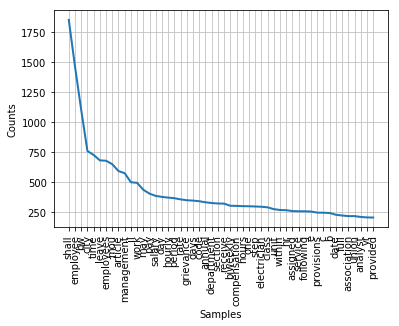

In [115]:
freq_dist = nltk.FreqDist(tokens[0])
#print(freq_dist)
print(freq_dist.most_common(50))
freq_dist.plot(50)

In [197]:
'''from nltk import pos_tag
pos_tokens = list()
for index in range(len(tokens)):
    pos_tokens.append(nltk.pos_tag(tokens[index]))
pos_tokens[0][0]'''

'from nltk import pos_tag\npos_tokens = list()\nfor index in range(len(tokens)):\n    pos_tokens.append(nltk.pos_tag(tokens[index]))\npos_tokens[0][0]'

In [198]:
'''from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return '' '''

"from nltk.corpus import wordnet\n\ndef get_wordnet_pos(treebank_tag):\n\n    if treebank_tag.startswith('J'):\n        return wordnet.ADJ\n    elif treebank_tag.startswith('V'):\n        return wordnet.VERB\n    elif treebank_tag.startswith('N'):\n        return wordnet.NOUN\n    elif treebank_tag.startswith('R'):\n        return wordnet.ADV\n    else:\n        return '' "

In [199]:
'''poses = [pos[1] for pos in pos_tokens[0]]
poses = set(poses)
poses'''

'poses = [pos[1] for pos in pos_tokens[0]]\nposes = set(poses)\nposes'

In [200]:
'''from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatise = list()
for i in range(len(pos_tokens)):
    for j in range(i):
        lemmatise.append(lemmatizer.lemmatize(pos_tokens[i][j][0], get_wordnet_pos(pos_tokens[i][j][1])))'''

'from nltk.stem import WordNetLemmatizer\n\nlemmatizer = WordNetLemmatizer()\nlemmatise = list()\nfor i in range(len(pos_tokens)):\n    for j in range(i):\n        lemmatise.append(lemmatizer.lemmatize(pos_tokens[i][j][0], get_wordnet_pos(pos_tokens[i][j][1])))'

In [219]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens = [[] for _ in range(len(tokens))]
for index in range(len(tokens)):
    for word in tokens[index]:
        stem_tokens[index].append(stemmer.stem(word))

In [221]:
stem_tokens[0][0:5]

['memorandum', 'understand', 'submiss', 'citi', 'council']

In [225]:
for index in range(1, len(tokens)+1):
    print("%s words in the contract n%s, with a vocabulary size of %s" % (len(tokens[index-1]), index, len(sorted(list(set(stem_tokens[index-1]))))))

73075 words in the contract n1, with a vocabulary size of 3369
858 words in the contract n2, with a vocabulary size of 350
32618 words in the contract n3, with a vocabulary size of 2732
51347 words in the contract n4, with a vocabulary size of 3714
63092 words in the contract n5, with a vocabulary size of 3516
11996 words in the contract n6, with a vocabulary size of 1540
56595 words in the contract n7, with a vocabulary size of 3256
33409 words in the contract n8, with a vocabulary size of 2670
15096 words in the contract n9, with a vocabulary size of 1698
56256 words in the contract n10, with a vocabulary size of 3318
66290 words in the contract n11, with a vocabulary size of 3459
45049 words in the contract n12, with a vocabulary size of 3074
106419 words in the contract n13, with a vocabulary size of 4128
40830 words in the contract n14, with a vocabulary size of 2967
32995 words in the contract n15, with a vocabulary size of 2426
36980 words in the contract n16, with a vocabulary 